## Contents
    01. Importing libraries and data
    02. Data exploration and visualizations
    03. Exporting vizs and data

# 01. Importing libraries and data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy

In [2]:
#Importing data
path=r'C:\Users\munav\Desktop\bootcamps\Achievement 6\US Car Accidents'
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'US_Car_Accidents_clean.pkl'))
sub_hour=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'City_accidents_per_hour.pkl'))

In [35]:
df.head()

,ID,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),City,County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Region,Year,Month,Hour,Weather,Licensed_Drivers
0,A-1,3,2016-02-08 00:37:08,40.108910,-83.092860,3.230,Dublin,Franklin,Ohio,42.099998,58.0,29.760000,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Midwest,2016,2,1,Light,7974951.0
1,A-2,2,2016-02-08 05:56:20,39.865420,-84.062800,0.747,Dayton,Montgomery,Ohio,36.900002,91.0,29.680000,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Midwest,2016,2,6,Light,7974951.0
2,A-3,2,2016-02-08 06:15:39,39.102660,-84.524680,0.055,Cincinnati,Hamilton,Ohio,36.000000,97.0,29.700001,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Midwest,2016,2,6,Light,7974951.0
3,A-4,2,2016-02-08 06:51:45,41.062130,-81.537840,0.123,Akron,Summit,Ohio,39.000000,55.0,29.650000,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Midwest,2016,2,7,Light,7974951.0
4,A-5,3,2016-02-08 07:53:43,39.172393,-84.492792,0.500,Cincinnati,Hamilton,Ohio,37.000000,93.0,29.690001,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Midwest,2016,2,8,Light,7974951.0


In [36]:
df.shape

(2304260, 37)

In [37]:
sub_hour.head()

,Date,Hour,State,County,City,City_accidents_per_hour,Avg_temp_per_hour,Avg_humid_per_hour,Avg_pressure_per_hour,Avg_visibility_per_hour,Avg_windmph_per_hour,Avg_precip_per_hour,Avg_distance_per_hour,Avg_severity_per_hour,_merge,Temp_category
0,2016-01-14,20,Pennsylvania,Lehigh,Whitehall,1,31.000000,69.0,29.530001,10.0,3.0,0.00,0.061,4.0,both,Very Cold
1,2016-02-08,1,Ohio,Franklin,Dublin,1,42.099998,58.0,29.760000,10.0,10.4,0.00,3.230,3.0,both,Normal
2,2016-02-08,6,Ohio,Hamilton,Cincinnati,1,36.000000,97.0,29.700001,10.0,NaN,0.02,0.055,2.0,both,Normal
3,2016-02-08,6,Ohio,Montgomery,Dayton,1,36.900002,91.0,29.680000,10.0,NaN,0.02,0.747,2.0,both,Normal
4,2016-02-08,7,Ohio,Summit,Akron,1,39.000000,55.0,29.650000,10.0,NaN,NaN,0.123,2.0,both,Normal


In [38]:
sub_hour.shape

(1749243, 16)

# 02. Data exploration and visualizations

In [39]:
#Replacing outliers with nan
df.loc[df['Temperature(F)']>170,'Temperature(F)']=np.nan
sub_hour.loc[sub_hour['Avg_temp_per_hour']>170, 'Avg_temp_per_hour']=np.nan

In [40]:
#Subsetting monthly car accidents data
sub=df.groupby(['Year','State'])['Month'].value_counts().reset_index(name='Total_accidents')

In [41]:
sub.shape

(3171, 4)

In [42]:
sub.head()

,Year,State,Month,Total_accidents
0,2016,Alabama,12,22
1,2016,Alabama,10,20
2,2016,Alabama,8,19
3,2016,Alabama,7,17
4,2016,Alabama,9,15


In [43]:
sub['Month']=sub['Month'].replace({'1':'January', '2':'February', '3':'March', '4':'April', '5':'May', '6':'June', '7':'July', '8':'August', '9':'September', '10':'October', '11':'Novemeber', '12':'December'})

In [44]:
#Combining year and month
sub['Date'] = pd.to_datetime(sub[['Year', 'Month']].assign(DAY=1))
sub=sub.drop(columns=['Year', 'Month'])
sub['Date']=sub['Date'].astype('datetime64')
sub.head()

,State,Total_accidents,Date
0,Alabama,22,2016-12-01
1,Alabama,20,2016-10-01
2,Alabama,19,2016-08-01
3,Alabama,17,2016-07-01
4,Alabama,15,2016-09-01


In [45]:
sub.set_index('Date', inplace=True)

## Exploring categorical variables

In [46]:
#REsetting display options
pd.options.display.max_columns=None

In [47]:
df.head()

,ID,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),City,County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Region,Year,Month,Hour,Weather,Licensed_Drivers
0,A-1,3,2016-02-08 00:37:08,40.108910,-83.092860,3.230,Dublin,Franklin,Ohio,42.099998,58.0,29.760000,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Midwest,2016,2,1,Light,7974951.0
1,A-2,2,2016-02-08 05:56:20,39.865420,-84.062800,0.747,Dayton,Montgomery,Ohio,36.900002,91.0,29.680000,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Midwest,2016,2,6,Light,7974951.0
2,A-3,2,2016-02-08 06:15:39,39.102660,-84.524680,0.055,Cincinnati,Hamilton,Ohio,36.000000,97.0,29.700001,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Midwest,2016,2,6,Light,7974951.0
3,A-4,2,2016-02-08 06:51:45,41.062130,-81.537840,0.123,Akron,Summit,Ohio,39.000000,55.0,29.650000,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Midwest,2016,2,7,Light,7974951.0
4,A-5,3,2016-02-08 07:53:43,39.172393,-84.492792,0.500,Cincinnati,Hamilton,Ohio,37.000000,93.0,29.690001,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Midwest,2016,2,8,Light,7974951.0


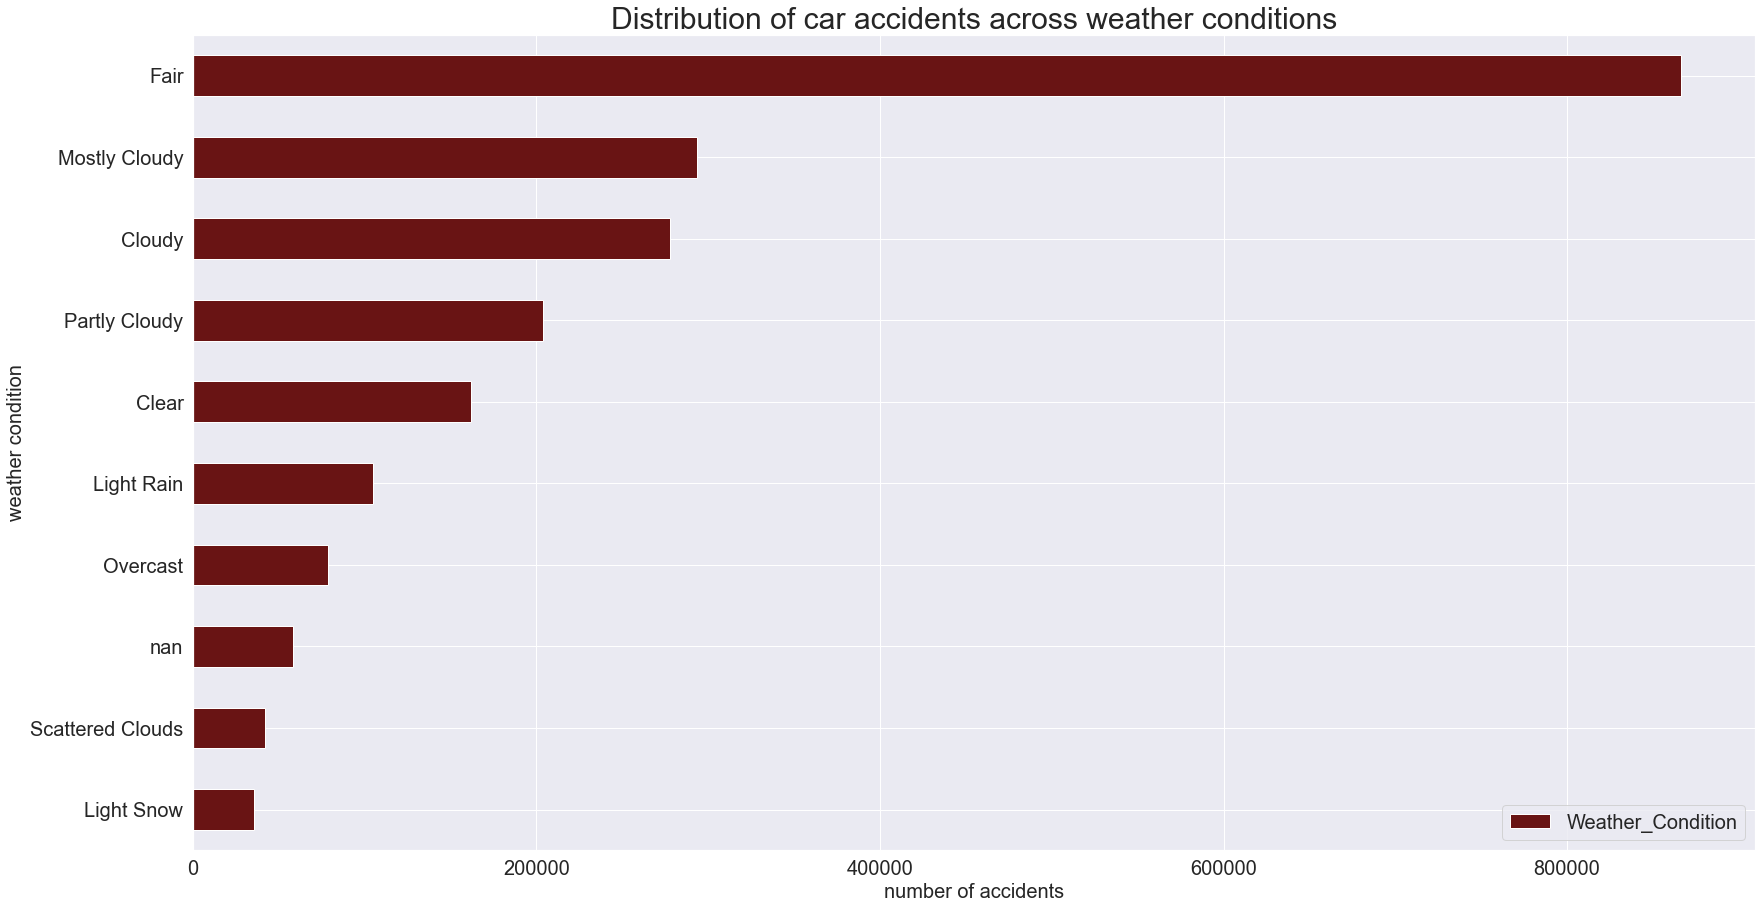

In [48]:
#Setting script figure size to 28,15
sns.set(rc = {'figure.figsize':(28,15)})
#Distribution of customers across weather conditions
bar_weather_conditions=df['Weather_Condition'].value_counts().sort_values(ascending=1).tail(10).plot.barh(color=['#691414'], fontsize=20)
plt.title('Distribution of car accidents across weather conditions', fontsize=30)
plt.xlabel('number of accidents', fontsize=20)
plt.ylabel('weather condition', fontsize=20)
plt.legend(fontsize=20)

<AxesSubplot:title={'center':'Composition of car accidents by wetaher category'}>

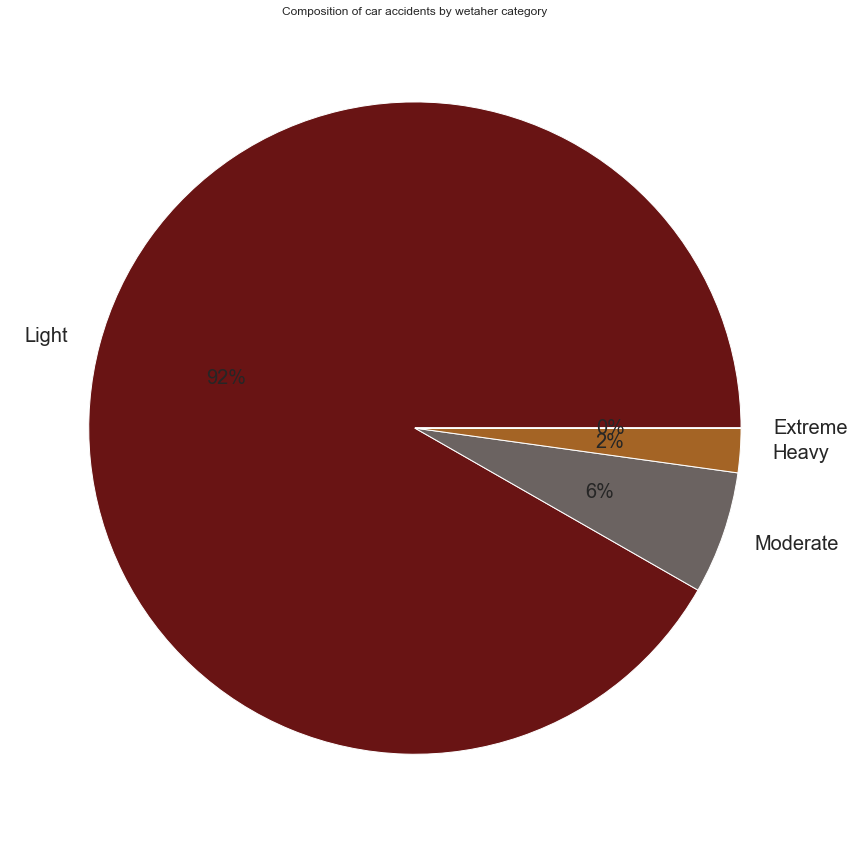

In [49]:
#Composition of car accidents by weather category
weather=df['Weather'].value_counts()
pie_weather=weather.plot.pie(title='Composition of car accidents by wetaher category', label='',autopct=('%1.f%%'), colors=['#691414','#6b6361','#a46425'], textprops={'fontsize': 20})
pie_weather

Text(0, 0.5, 'Frequency')

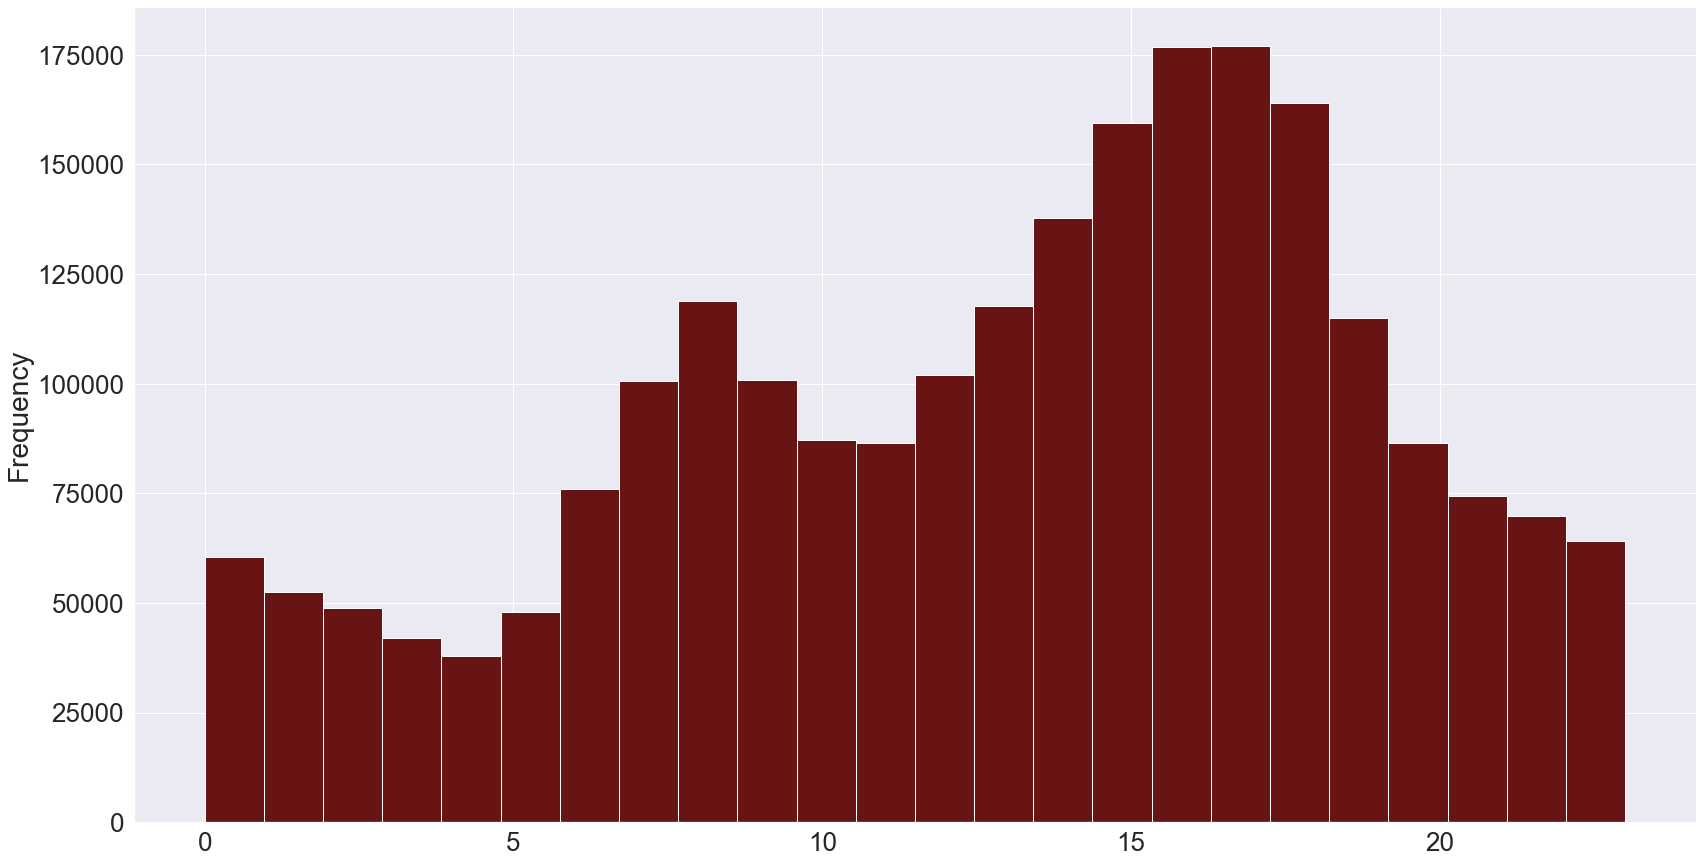

In [50]:
#Creating a histogram
df['Hour'].plot.hist(bins=24, color='#691414', fontsize=26)
plt.ylabel('Frequency', fontsize=28)

Text(0, 0.5, 'Frequency')

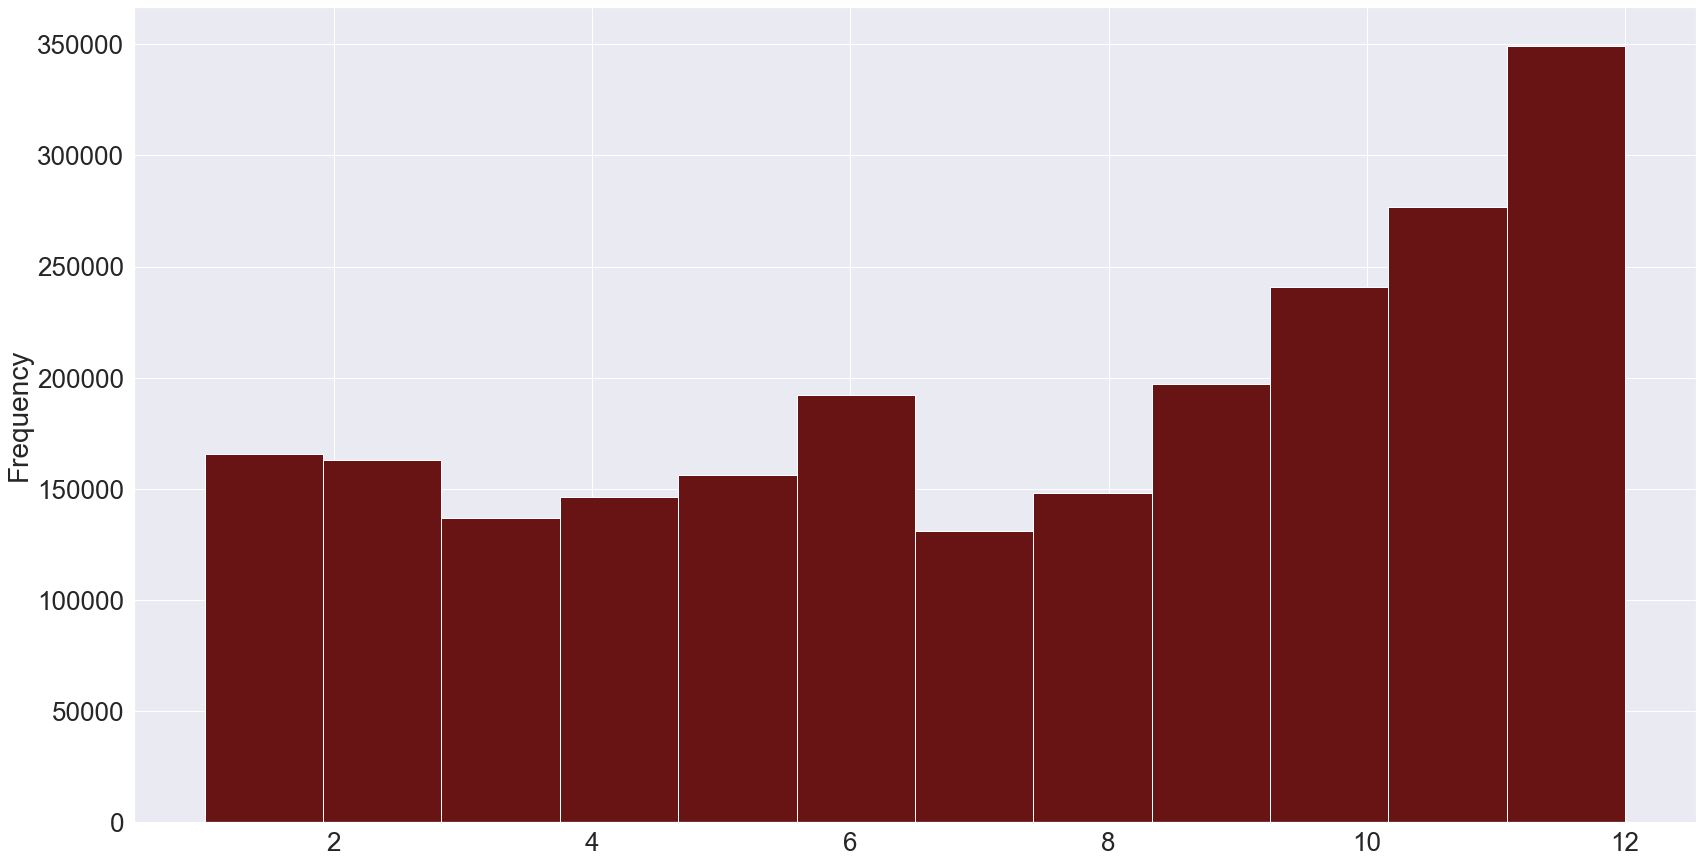

In [51]:
#Creating a histogram
df['Month'].plot.hist(bins=12, color='#691414', fontsize=26)
plt.ylabel('Frequency', fontsize=28)

In [52]:
day_df = pd.DataFrame(df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'})

In [53]:
#Creating a histogram
df['Day']=df['Start_Time'].dt.day_name()
df.head()

,ID,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),City,County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Region,Year,Month,Hour,Weather,Licensed_Drivers,Day
0,A-1,3,2016-02-08 00:37:08,40.108910,-83.092860,3.230,Dublin,Franklin,Ohio,42.099998,58.0,29.760000,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Midwest,2016,2,1,Light,7974951.0,Monday
1,A-2,2,2016-02-08 05:56:20,39.865420,-84.062800,0.747,Dayton,Montgomery,Ohio,36.900002,91.0,29.680000,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Midwest,2016,2,6,Light,7974951.0,Monday
2,A-3,2,2016-02-08 06:15:39,39.102660,-84.524680,0.055,Cincinnati,Hamilton,Ohio,36.000000,97.0,29.700001,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Midwest,2016,2,6,Light,7974951.0,Monday
3,A-4,2,2016-02-08 06:51:45,41.062130,-81.537840,0.123,Akron,Summit,Ohio,39.000000,55.0,29.650000,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Midwest,2016,2,7,Light,7974951.0,Monday
4,A-5,3,2016-02-08 07:53:43,39.172393,-84.492792,0.500,Cincinnati,Hamilton,Ohio,37.000000,93.0,29.690001,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Midwest,2016,2,8,Light,7974951.0,Monday


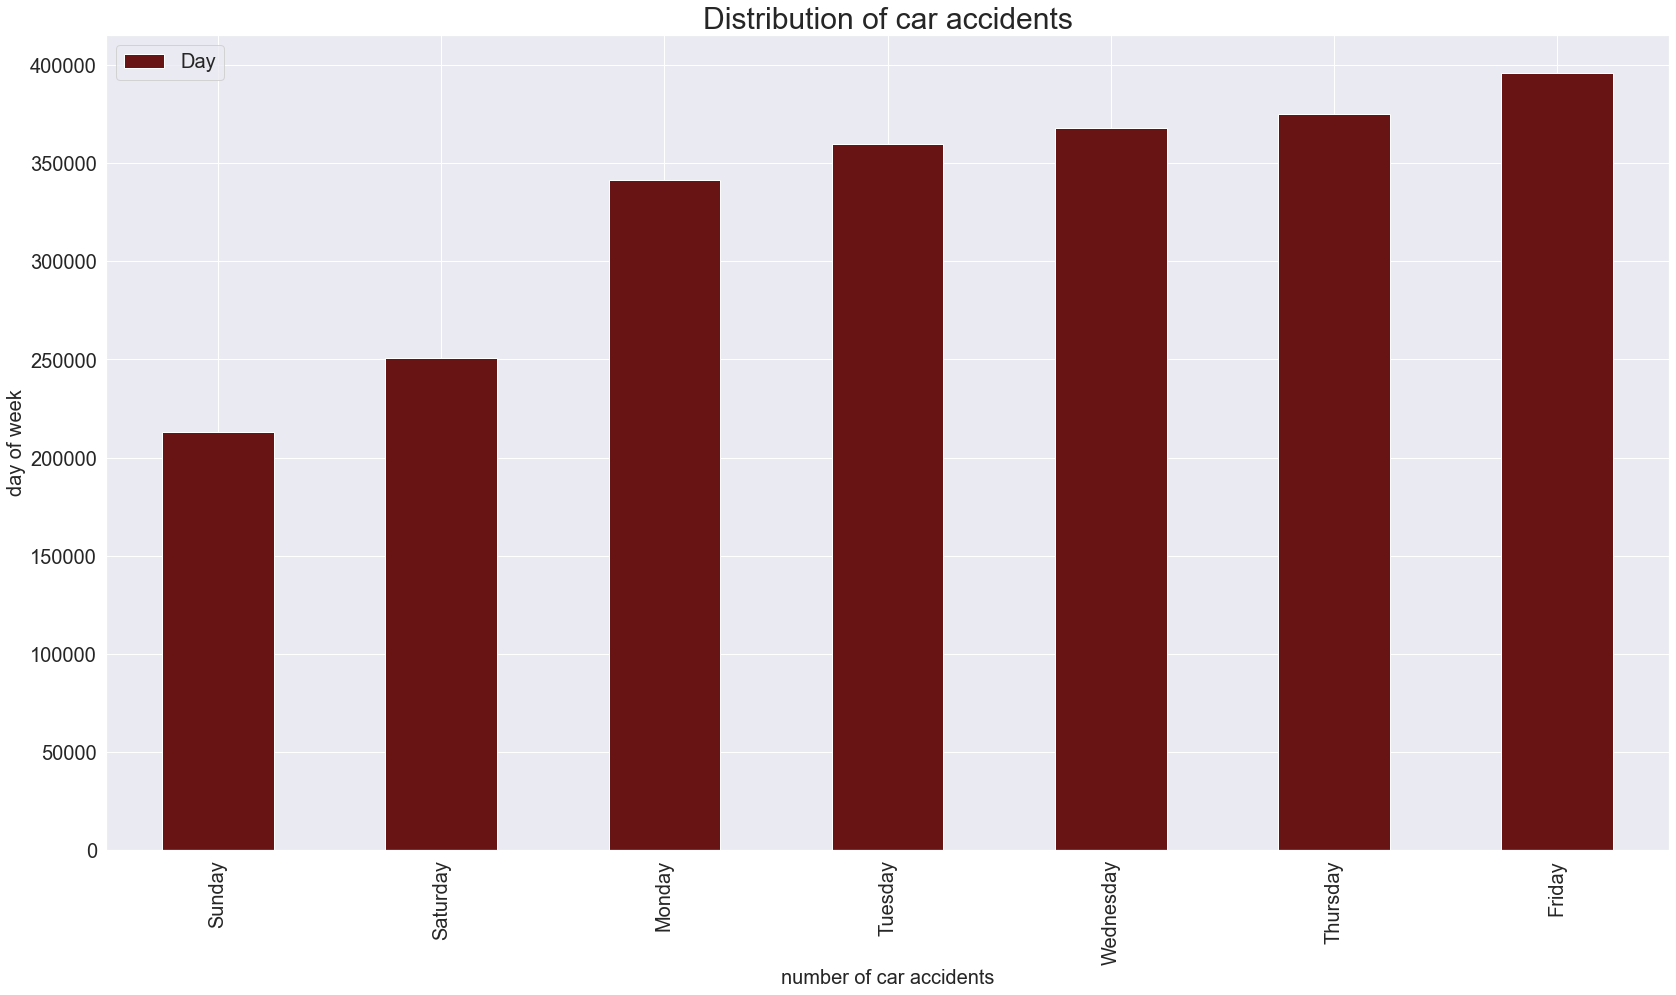

In [54]:
#Distribution of customers across regions
bar_day=df['Day'].value_counts(dropna=False).sort_values(ascending=True).plot.bar(color=['#691414'], fontsize=20)
plt.title('Distribution of car accidents', fontsize=30)
plt.xlabel('number of car accidents', fontsize=20)
plt.ylabel('day of week', fontsize=20)
plt.legend(fontsize=20)

In [55]:
#Presence of amenities during the accidents
amenity=df[['Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']].apply(pd.Series.value_counts)
amenity

,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
False,2303440,2151789,2298555,2048691,2300955,2285737,2304155,2257991,2265167,2302911,2083977,2304260.0
True,820,152471,5705,255569,3305,18523,105,46269,39093,1349,220283,NaN


In [56]:
amenity_t=amenity.transpose()
amenity_t=amenity_t.rename(columns={False:'not present', True:'present'})
amenity_t

,not present,present
Bump,2303440.0,820.0
Crossing,2151789.0,152471.0
Give_Way,2298555.0,5705.0
Junction,2048691.0,255569.0
No_Exit,2300955.0,3305.0
Railway,2285737.0,18523.0
Roundabout,2304155.0,105.0
Station,2257991.0,46269.0
Stop,2265167.0,39093.0
Traffic_Calming,2302911.0,1349.0


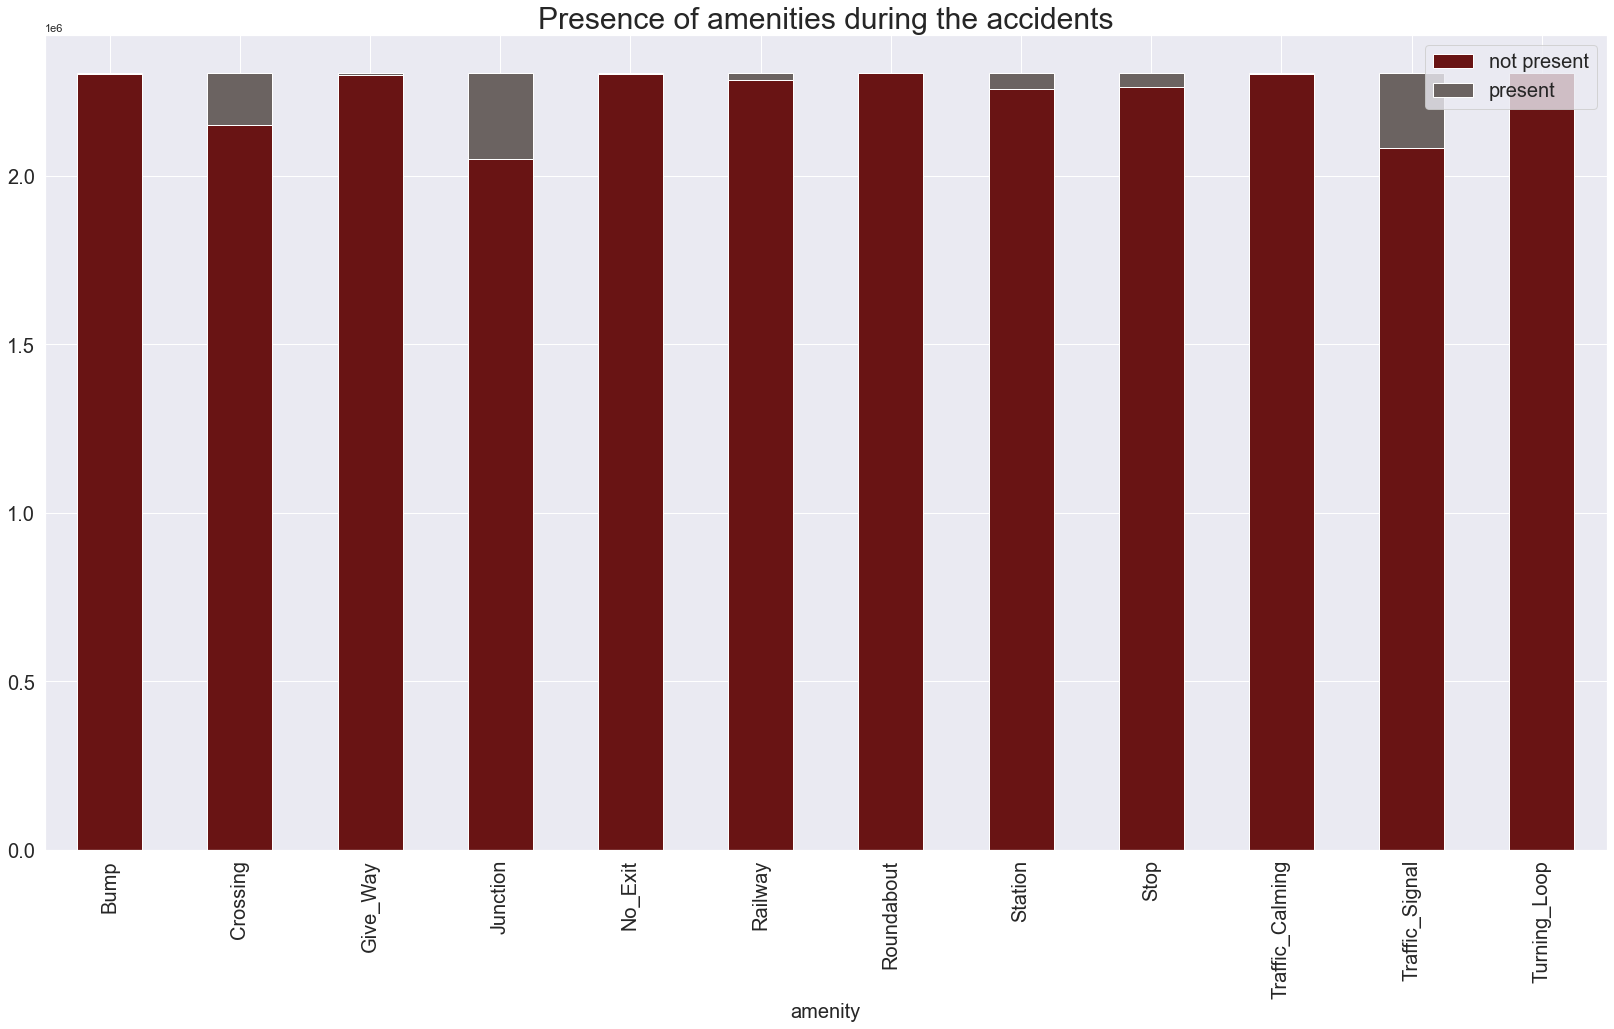

In [57]:
#Presence of amenities during the accidents
bar_amenity=amenity_t.plot.bar(stacked=True,color=['#691414','#6b6361'], fontsize=20)
plt.title('Presence of amenities during the accidents', fontsize=30)
plt.xlabel('amenity', fontsize=20)
plt.legend(fontsize=20, loc='upper right')

In [58]:
df.head()

,ID,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),City,County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Region,Year,Month,Hour,Weather,Licensed_Drivers,Day
0,A-1,3,2016-02-08 00:37:08,40.108910,-83.092860,3.230,Dublin,Franklin,Ohio,42.099998,58.0,29.760000,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Midwest,2016,2,1,Light,7974951.0,Monday
1,A-2,2,2016-02-08 05:56:20,39.865420,-84.062800,0.747,Dayton,Montgomery,Ohio,36.900002,91.0,29.680000,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Midwest,2016,2,6,Light,7974951.0,Monday
2,A-3,2,2016-02-08 06:15:39,39.102660,-84.524680,0.055,Cincinnati,Hamilton,Ohio,36.000000,97.0,29.700001,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Midwest,2016,2,6,Light,7974951.0,Monday
3,A-4,2,2016-02-08 06:51:45,41.062130,-81.537840,0.123,Akron,Summit,Ohio,39.000000,55.0,29.650000,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Midwest,2016,2,7,Light,7974951.0,Monday
4,A-5,3,2016-02-08 07:53:43,39.172393,-84.492792,0.500,Cincinnati,Hamilton,Ohio,37.000000,93.0,29.690001,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Midwest,2016,2,8,Light,7974951.0,Monday


In [59]:
df['Date']=df['Start_Time'].dt.date
df.head()

,ID,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),City,County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Region,Year,Month,Hour,Weather,Licensed_Drivers,Day,Date
0,A-1,3,2016-02-08 00:37:08,40.108910,-83.092860,3.230,Dublin,Franklin,Ohio,42.099998,58.0,29.760000,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Midwest,2016,2,1,Light,7974951.0,Monday,2016-02-08
1,A-2,2,2016-02-08 05:56:20,39.865420,-84.062800,0.747,Dayton,Montgomery,Ohio,36.900002,91.0,29.680000,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Midwest,2016,2,6,Light,7974951.0,Monday,2016-02-08
2,A-3,2,2016-02-08 06:15:39,39.102660,-84.524680,0.055,Cincinnati,Hamilton,Ohio,36.000000,97.0,29.700001,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Midwest,2016,2,6,Light,7974951.0,Monday,2016-02-08
3,A-4,2,2016-02-08 06:51:45,41.062130,-81.537840,0.123,Akron,Summit,Ohio,39.000000,55.0,29.650000,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Midwest,2016,2,7,Light,7974951.0,Monday,2016-02-08
4,A-5,3,2016-02-08 07:53:43,39.172393,-84.492792,0.500,Cincinnati,Hamilton,Ohio,37.000000,93.0,29.690001,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Midwest,2016,2,8,Light,7974951.0,Monday,2016-02-08


In [60]:
#Creating  a subset of data for geospatial visualizations
sub_geo=df.groupby(['Year'])['State'].value_counts().reset_index(name='Number_of_accidents_per_state')
sub_geo.head()

,Year,State,Number_of_accidents_per_state
0,2016,California,32354
1,2016,Texas,8864
2,2016,Florida,8428
3,2016,New York,6487
4,2016,Illinois,6421


In [61]:
sub_drivers=df.groupby(['Year','State']).agg({'Licensed_Drivers':'mean'})
sub_drivers.head()

Licensed_Drivers
Year State                       
2016 Alabama            3943082.0
     Arizona            5082305.0
     Arkansas           2391103.0
     California        26199436.0
     Colorado           4066580.0

In [62]:
#Merging datasets
sub_merged=sub_geo.merge(sub_drivers,on=['Year', 'State'], how='inner')
sub_merged.head()

,Year,State,Number_of_accidents_per_state,Licensed_Drivers
0,2016,California,32354,26199436.0
1,2016,Texas,8864,15879876.0
2,2016,Florida,8428,14675160.0
3,2016,New York,6487,11947568.0
4,2016,Illinois,6421,8514644.0


In [63]:
#Calculating number of accidents per 10,000 licensed drivers
sub_merged['Accidents_per_driver']=round((sub_merged['Number_of_accidents_per_state']/sub_merged['Licensed_Drivers']*10000), 0)
sub_merged=sub_merged.rename(columns={'Accidents_per_driver':'Accidents_per_10000_drivers'})
sub_merged.head()

,Year,State,Number_of_accidents_per_state,Licensed_Drivers,Accidents_per_10000_drivers
0,2016,California,32354,26199436.0,12.0
1,2016,Texas,8864,15879876.0,6.0
2,2016,Florida,8428,14675160.0,6.0
3,2016,New York,6487,11947568.0,5.0
4,2016,Illinois,6421,8514644.0,8.0


In [64]:
#deleting columns to enable editng in tableau
df2=df.drop(columns=['Start_Time', 'Distance(mi)','City','County','State' ])

In [66]:
#Creating sample for sub_hour
#Assigning random numbers and creating a list containing True/False values
np.random.seed(4)
dev = np.random.rand(len(sub_hour)) <= 0.7

In [67]:
# Store 30% in small
small = sub_hour[~dev]

# 03. Exporting vizs and data

In [65]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'US_Car_Accidents_final2.csv'))
sub_hour.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'City_accidents_per_hour_final.csv'))
amenity_t.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Amenities.csv'))
sub_merged.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Accidents-drivers.csv'))

In [68]:
small.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'City_accidents_per_hour_sample.csv'))